# Statistical Data Analysis
# Project Description

Objective: Conduct a customer behavior analysis and determine which prepaid package generates more revenue.

Company Details:

Megaline is a telecommunications company that offers two prepaid packages: Surf and Ultimate.

Prepaid Package - Surf:

- Monthly cost: 20 USD
- 500 minutes of call duration per month, 50 SMS, and 15 GB of data
- Once exceeding the package limit, the following charges apply:
- 1 minute: 3 cents
- 1 SMS: 3 cents
- 1 GB of data: 10 USD

Prepaid Package - Ultimate:

- Monthly cost: 70 USD
- 3000 minutes of call duration per month, 1000 SMS, and 30 GB of data
- Once exceeding the package limit, the following charges apply:
- 1 minute: 1 cent
- 1 SMS: 1 cent
- 1 GB of data: 7 USD
Notes:

- Megaline rounds seconds up to the minute and megabits up to the gigabit.
- Each individual call is rounded up, even if it's just one second, it will be counted as one minute.
- Each web session is not rounded up. However, the total for a month is rounded up (e.g., if a user consumes 1025 megabits this month, they will be charged for 2 gigabits).
- Sample data for Megaline customers = 500
- An initial analysis is needed for these prepaid packages based on a relatively small sample size of customers.
- The objective is to identify who they are, where they are from, which package they use, and the number of calls and messages they sent in the year 2018.


## Open the data file and learn the general information

File path:
- /datasets/megaline_calls.csv 
- /datasets/megaline_internet.csv 
- /datasets/megaline_messages.csv 
- /datasets/megaline_plans.csv 
- /datasets/megaline_users.csv 

In [1]:
#import libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency,ttest_ind

import warnings
warnings.filterwarnings ('ignore')

In [2]:
#read and save the datasets
df_call = pd.read_csv('/datasets/megaline_calls.csv')
df_inet = pd.read_csv('/datasets/megaline_internet.csv')
df_msg = pd.read_csv('/datasets/megaline_messages.csv')
df_plans = pd.read_csv('/datasets/megaline_plans.csv')
df_users = pd.read_csv('/datasets/megaline_users.csv')


### call data

In [3]:
#info dataset call
df_call.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


In [4]:
#sample dataset call
df_call.head()

,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,8.52
1,1000_145,1000,2018-12-27,13.66
2,1000_247,1000,2018-12-27,14.48
3,1000_309,1000,2018-12-28,5.76
4,1000_380,1000,2018-12-30,4.22


In [5]:
#checking duplicate in call dataset
df_call.duplicated().sum()

0

In [6]:
#checking null value in call dataset
df_call.isnull().sum()

id           0
user_id      0
call_date    0
duration     0
dtype: int64

In [7]:
#describe  the call dataset
df_call.describe()

,user_id,duration
count,137735.000000,137735.000000
mean,1247.658046,6.745927
std,139.416268,5.839241
min,1000.000000,0.000000
25%,1128.000000,1.290000
50%,1247.000000,5.980000
75%,1365.000000,10.690000
max,1499.000000,37.600000


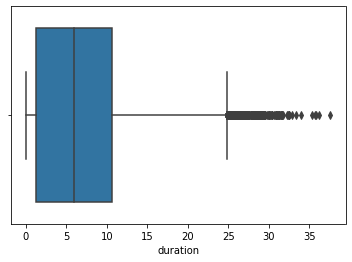

In [8]:
#chek df call dataset boxplot for 'duration' column
sns.boxplot(df_call['duration']);

findings:

- No suspicious/abnormal data found.
- No missing data.
- No duplicate data.
- The data type of 'call_date' is object.
- No outliers in the 'duration' column.


### duration data

In [9]:
#checking information in internet dataset
df_inet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


In [10]:
#dataset sample
df_inet.head()

,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86
1,1000_204,1000,2018-12-31,0.00
2,1000_379,1000,2018-12-28,660.40
3,1000_413,1000,2018-12-26,270.99
4,1000_442,1000,2018-12-27,880.22


In [11]:
#checking duplicate in internet dataset
df_inet.duplicated().sum()

0

In [12]:
#checking null value in internet dataset
df_inet.isnull().sum()

id              0
user_id         0
session_date    0
mb_used         0
dtype: int64

In [13]:
#describe internet column
df_inet.describe()

,user_id,mb_used
count,104825.000000,104825.000000
mean,1242.496361,366.713701
std,142.053913,277.170542
min,1000.000000,0.000000
25%,1122.000000,136.080000
50%,1236.000000,343.980000
75%,1367.000000,554.610000
max,1499.000000,1693.470000


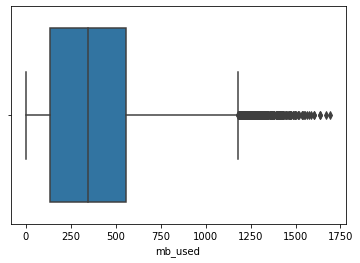

In [14]:
#chek boxplot column mb_used 
sns.boxplot(df_inet['mb_used']);

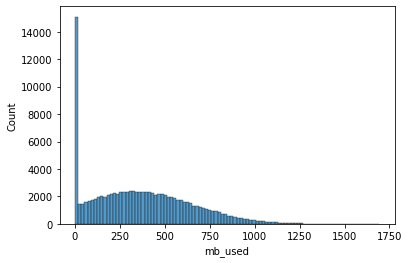

In [15]:
#check histogram in column 'mb_used'
sns.histplot(df_inet['mb_used']);

Internet dataset findings:

- Suspicious/abnormal data found: mb_used = 0
- No missing data.
- No duplicate data.
- The data type of 'session_date' is object.
- No outliers in the 'mb_used' column.

### message data

In [16]:
#dataset message info
df_msg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [17]:
#display dataset
df_msg.head()

,id,user_id,message_date
0,1000_125,1000,2018-12-27
1,1000_160,1000,2018-12-31
2,1000_223,1000,2018-12-31
3,1000_251,1000,2018-12-27
4,1000_255,1000,2018-12-26


In [18]:
#check duplicate
df_msg.duplicated().sum()

0

In [19]:
#check null value
df_msg.isnull().sum()

id              0
user_id         0
message_date    0
dtype: int64

In [20]:
#describe dataset
df_msg.describe()

,user_id
count,76051.000000
mean,1245.972768
std,139.843635
min,1000.000000
25%,1123.000000
50%,1251.000000
75%,1362.000000
max,1497.000000


Message dataset findings:

- No suspicious/abnormal data found.
- No missing data.
- No duplicate data.
- The data type of 'message_date' is object.

### plans data

In [21]:
#check plans dataset info
df_plans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes


In [22]:
#display plans dataset
df_plans.head()

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


In [23]:
#check duplicate
df_plans.duplicated().sum()

0

In [24]:
#check null value
df_plans.isnull().sum()

messages_included        0
mb_per_month_included    0
minutes_included         0
usd_monthly_pay          0
usd_per_gb               0
usd_per_message          0
usd_per_minute           0
plan_name                0
dtype: int64

In [25]:
#describe plans dataset
df_plans.describe()

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute
count,2.000000,2.000000,2.000000,2.000000,2.00000,2.000000,2.000000
mean,525.000000,23040.000000,1750.000000,45.000000,8.50000,0.020000,0.020000
std,671.751442,10861.160159,1767.766953,35.355339,2.12132,0.014142,0.014142
min,50.000000,15360.000000,500.000000,20.000000,7.00000,0.010000,0.010000
25%,287.500000,19200.000000,1125.000000,32.500000,7.75000,0.015000,0.015000
50%,525.000000,23040.000000,1750.000000,45.000000,8.50000,0.020000,0.020000
75%,762.500000,26880.000000,2375.000000,57.500000,9.25000,0.025000,0.025000
max,1000.000000,30720.000000,3000.000000,70.000000,10.00000,0.030000,0.030000


Plans Dataset findings:

No suspicious/abnormal data found.
No missing data.
No duplicate data.
Data types are correct.

### users data

In [26]:
#check users dataset info
df_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [27]:
#display users dataset
df_users.head()

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN


In [28]:
#check duplicate
df_users.duplicated().sum()

0

In [29]:
#check null value
df_users.isnull().sum().sort_values(ascending = False)

churn_date    466
user_id         0
first_name      0
last_name       0
age             0
city            0
reg_date        0
plan            0
dtype: int64

In [30]:
#describe users dataset
df_users.describe()

,user_id,age
count,500.000000,500.000000
mean,1249.500000,45.486000
std,144.481833,16.972269
min,1000.000000,18.000000
25%,1124.750000,30.000000
50%,1249.500000,46.000000
75%,1374.250000,61.000000
max,1499.000000,75.000000



Users dataset findings:

- There are 466 missing data in the 'churn_date' column.
- No suspicious/abnormal data found.
- No duplicate data.
- Data type of 'reg_date' is object.
- Data type of 'churn_date' is object.
- For analysis purposes, the dataset is filtered to include only users from the NY-NJ area, and the rest are cleaned out.

## Preparing the Data

Based on the findings from the previous Stage 1 data exploration, the following actions need to be taken:

1. Handling missing data:

- Fill the missing values in the 'churn_date' column of the Users dataset with 'on_service' because missing values here mean that the service is currently in use.
2. Handling suspicious data:

- Remove rows with 'mb_used' = 0 from the Internet dataset. These rows could indicate unanswered calls and don't provide useful data for analysis.
3. Data type adjustments:

- Convert the 'call_date' column from object to datetime format in the Call dataset.
- Convert the 'session_date' column from object to datetime format in the Internet dataset.
- Convert the 'message_date' column from object to datetime format in the Message dataset.
- Convert the 'reg_date' and 'churn_date' columns from object to datetime format in the Users dataset.
4. Data filtering:

- Filter the data to include only users from the NY-NJ area for analysis.

After completing these steps, the following analyses will be conducted:

- Calculate the number of calls made and minutes used per month.
- Calculate the number of SMS sent per month.
- Calculate the data volume per month.
- Calculate the monthly revenue from each user (subtracting the free package limits from the total number of calls, SMS, and data; then multiplying the result by the phone package rates; and adding the monthly fee depending on the phone package).

In [31]:
#Filling in missing values in the 'churn_date' column in the users dataset
df_users['churn_date']= df_users['churn_date'].fillna('on_service')
df_users.head()

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,on_service
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,on_service
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,on_service
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,on_service
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,on_service


In [32]:
#check null value
df_users.isnull().sum().sort_values(ascending = False)

user_id       0
first_name    0
last_name     0
age           0
city          0
reg_date      0
plan          0
churn_date    0
dtype: int64

<AxesSubplot:xlabel='mb_used', ylabel='Count'>

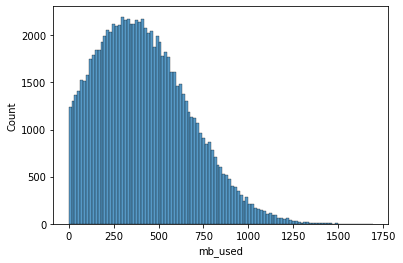

In [33]:
#remove '0' value in column 'mb_used'
df_inet = df_inet[(df_inet['mb_used']>0)]
sns.histplot(df_inet['mb_used'])

In [34]:
#check df_call dataset
df_call.head()

,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,8.52
1,1000_145,1000,2018-12-27,13.66
2,1000_247,1000,2018-12-27,14.48
3,1000_309,1000,2018-12-28,5.76
4,1000_380,1000,2018-12-30,4.22


In [35]:
# convert call_date datatypes into datetime
df_call['call_date'] = pd.to_datetime(df_call['call_date'])

In [36]:
# convert session_date datatypes into datetime
df_inet['session_date'] = pd.to_datetime(df_inet['session_date'])

In [37]:
# convert message_date datatypes into datetime
df_msg['message_date'] = pd.to_datetime(df_msg['message_date'])

In [38]:
# convert reg_date datatypes into datetime
df_users['reg_date'] = pd.to_datetime(df_users['reg_date'])

After that, we will calculate:

- The total number of calls made and minutes used per month.
- The volume of data used per month.
- The total number of SMS sent per month.
- The monthly revenue from each user (by subtracting the free package limits from the total number of calls, SMS, and data; then multiplying the result by the phone package rate; and adding the monthly fee depending on the package).

### Find the number of calls made per month

In [39]:
#check df_call dataset
df_call.head ()

,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,8.52
1,1000_145,1000,2018-12-27,13.66
2,1000_247,1000,2018-12-27,14.48
3,1000_309,1000,2018-12-28,5.76
4,1000_380,1000,2018-12-30,4.22


In [40]:
#create column year_month  --> for further monthly analysis
df_call['year_month'] = pd.to_datetime(df_call['call_date']).dt.to_period('M').astype(str)


In [41]:
#round up duration collumn
df_call['duration_round'] = df_call['duration'].apply(np.ceil).astype('int')
df_call.tail()

,id,user_id,call_date,duration,year_month,duration_round
137730,1499_199,1499,2018-11-21,8.72,2018-11,9
137731,1499_200,1499,2018-10-20,10.89,2018-10,11
137732,1499_201,1499,2018-09-21,8.12,2018-09,9
137733,1499_202,1499,2018-10-10,0.37,2018-10,1
137734,1499_203,1499,2018-12-29,13.86,2018-12,14


In [42]:
#Find the number of calls made and minutes used per month
df_call_agg = df_call.groupby(['user_id','year_month']).agg({'duration_round' : 'sum'}).reset_index()
df_call_agg.head()

,user_id,year_month,duration_round
0,1000,2018-12,124
1,1001,2018-08,182
2,1001,2018-09,315
3,1001,2018-10,393
4,1001,2018-11,426


### Find Data/Internet Volume Per Month

In [43]:
#chek internet dataset 
df_inet.head()

,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86
2,1000_379,1000,2018-12-28,660.40
3,1000_413,1000,2018-12-26,270.99
4,1000_442,1000,2018-12-27,880.22
5,1001_0,1001,2018-08-24,284.68


In [44]:
#create column year_month  --> for further monthly analysis
df_inet['year_month'] = pd.to_datetime(df_inet['session_date']).dt.to_period('M').astype(str)


In [45]:
##Find the internet data used per month
df_inet_agg = df_inet.groupby(['user_id','year_month']).agg({'mb_used' : 'sum'}).reset_index()
df_inet_agg.head()

,user_id,year_month,mb_used
0,1000,2018-12,1901.47
1,1001,2018-08,6919.15
2,1001,2018-09,13314.82
3,1001,2018-10,22330.49
4,1001,2018-11,18504.30


In [46]:
#convert to gigabite
df_inet_agg['gb_used'] = df_inet_agg['mb_used']/1024

In [47]:
#round up mb_used
df_inet_agg['gb_used_round'] = df_inet_agg['gb_used'].apply(np.ceil).astype('int')
df_inet_agg.head()

,user_id,year_month,mb_used,gb_used,gb_used_round
0,1000,2018-12,1901.47,1.856904,2
1,1001,2018-08,6919.15,6.756982,7
2,1001,2018-09,13314.82,13.002754,14
3,1001,2018-10,22330.49,21.807119,22
4,1001,2018-11,18504.30,18.070605,19


<AxesSubplot:xlabel='gb_used_round', ylabel='Density'>

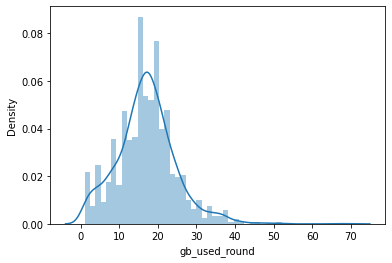

In [48]:
#distribution check
sns.distplot(df_inet_agg['gb_used_round'])

### Find the number of SMS per month

In [49]:
#chek message dataset
df_msg.head()

,id,user_id,message_date
0,1000_125,1000,2018-12-27
1,1000_160,1000,2018-12-31
2,1000_223,1000,2018-12-31
3,1000_251,1000,2018-12-27
4,1000_255,1000,2018-12-26


In [50]:
#create column year_month  --> for further monthly analysis
df_msg['year_month'] = pd.to_datetime(df_msg['message_date']).dt.to_period('M').astype(str)

In [51]:
#Find the message count per month
df_msg_agg = df_msg.groupby(['user_id','year_month']).agg({'id' : 'count'}).reset_index().rename(columns={'id':'msg_count'})
df_msg_agg.head()

,user_id,year_month,msg_count
0,1000,2018-12,11
1,1001,2018-08,30
2,1001,2018-09,44
3,1001,2018-10,53
4,1001,2018-11,36


<AxesSubplot:xlabel='msg_count', ylabel='Density'>

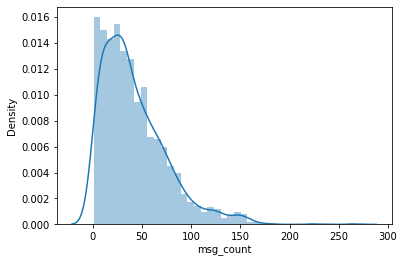

In [52]:
#msg_count distribution check
sns.distplot(df_msg_agg['msg_count'])

### Monthly revenue from each user (by subtracting the free plan limit from the total number of calls, SMS, and data; then multiplying the result by the value of the phone plan; and adding the monthly fee depending on the phone plan)

In [53]:
#chek dataset df_call_agg
df_call_agg.head()

,user_id,year_month,duration_round
0,1000,2018-12,124
1,1001,2018-08,182
2,1001,2018-09,315
3,1001,2018-10,393
4,1001,2018-11,426


In [54]:
#chek dataset df_inet_agg
df_inet_agg.head()

,user_id,year_month,mb_used,gb_used,gb_used_round
0,1000,2018-12,1901.47,1.856904,2
1,1001,2018-08,6919.15,6.756982,7
2,1001,2018-09,13314.82,13.002754,14
3,1001,2018-10,22330.49,21.807119,22
4,1001,2018-11,18504.30,18.070605,19


In [55]:
#chek dataset df_msg_agg
df_msg_agg.head()

,user_id,year_month,msg_count
0,1000,2018-12,11
1,1001,2018-08,30
2,1001,2018-09,44
3,1001,2018-10,53
4,1001,2018-11,36


In [56]:
#joining call dan internet dataset table 
df_merge1 = pd.merge(df_call_agg,df_inet_agg, on = ['user_id','year_month'], how ='outer')

In [57]:
#check null value
df_merge1.isnull().sum()

user_id            0
year_month         0
duration_round    34
mb_used           15
gb_used           15
gb_used_round     15
dtype: int64

In [58]:
#replace null value with '0'
df_merge1 = df_merge1.fillna(0)
df_merge1.head()

,user_id,year_month,duration_round,mb_used,gb_used,gb_used_round
0,1000,2018-12,124.0,1901.47,1.856904,2.0
1,1001,2018-08,182.0,6919.15,6.756982,7.0
2,1001,2018-09,315.0,13314.82,13.002754,14.0
3,1001,2018-10,393.0,22330.49,21.807119,22.0
4,1001,2018-11,426.0,18504.30,18.070605,19.0


In [59]:
#joining df_merge1 with message table
df_merge2 = pd.merge(df_merge1,df_msg_agg, on = ['user_id','year_month'], how ='outer')
#check null value
df_merge2.isnull().sum()

user_id             0
year_month          0
duration_round      1
mb_used             1
gb_used             1
gb_used_round       1
msg_count         487
dtype: int64

In [60]:
#replace null value with '0'
df_merge2 = df_merge2.fillna(0)
df_merge2.head()

,user_id,year_month,duration_round,mb_used,gb_used,gb_used_round,msg_count
0,1000,2018-12,124.0,1901.47,1.856904,2.0,11.0
1,1001,2018-08,182.0,6919.15,6.756982,7.0,30.0
2,1001,2018-09,315.0,13314.82,13.002754,14.0,44.0
3,1001,2018-10,393.0,22330.49,21.807119,22.0,53.0
4,1001,2018-11,426.0,18504.30,18.070605,19.0,36.0


In [61]:
#remove un-used columns
df_merge2 = df_merge2.drop(columns=['mb_used','gb_used'])

In [62]:
#check dataset
df_merge2.head()

,user_id,year_month,duration_round,gb_used_round,msg_count
0,1000,2018-12,124.0,2.0,11.0
1,1001,2018-08,182.0,7.0,30.0
2,1001,2018-09,315.0,14.0,44.0
3,1001,2018-10,393.0,22.0,53.0
4,1001,2018-11,426.0,19.0,36.0


In [63]:
#joining df_plan and df_user table
df_plans.head()

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


In [64]:
#change mb_per_month_included to gigabite
df_plans['gb_per_month_included'] = df_plans['mb_per_month_included']/1024
df_plans.head()

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name,gb_per_month_included
0,50,15360,500,20,10,0.03,0.03,surf,15.0
1,1000,30720,3000,70,7,0.01,0.01,ultimate,30.0


In [65]:
#chek dataset user
df_users.head()

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,on_service
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,on_service
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,on_service
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,on_service
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,on_service


In [66]:
#joining table users with table plans
df_merge3 = pd.merge(df_users,df_plans,left_on = 'plan', right_on = 'plan_name')

In [67]:
#check dataset
df_merge3.head()

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name,gb_per_month_included
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,on_service,1000,30720,3000,70,7,0.01,0.01,ultimate,30.0
1,1006,Jesusa,Bradford,73,"San Francisco-Oakland-Berkeley, CA MSA",2018-11-27,ultimate,2018-12-18,1000,30720,3000,70,7,0.01,0.01,ultimate,30.0
2,1008,Emely,Hoffman,53,"Orlando-Kissimmee-Sanford, FL MSA",2018-08-03,ultimate,on_service,1000,30720,3000,70,7,0.01,0.01,ultimate,30.0
3,1011,Halina,Henry,73,"Cleveland-Elyria, OH MSA",2018-01-18,ultimate,on_service,1000,30720,3000,70,7,0.01,0.01,ultimate,30.0
4,1013,Nicolas,Snider,50,"Knoxville, TN MSA",2018-12-01,ultimate,on_service,1000,30720,3000,70,7,0.01,0.01,ultimate,30.0


In [68]:
#joining all table (df_merge2 with df_merge3)
df_merge_all = pd.merge(df_merge2,df_merge3, on=['user_id'],how='inner')
#chek datasets size
df_merge_all.shape,df_merge2.shape, df_merge3.shape

((2293, 21), (2293, 5), (500, 17))

In [69]:
#check df_merge_all dataset
df_merge_all.head(3)

,user_id,year_month,duration_round,gb_used_round,msg_count,first_name,last_name,age,city,reg_date,...,churn_date,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name,gb_per_month_included
0,1000,2018-12,124.0,2.0,11.0,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,...,on_service,1000,30720,3000,70,7,0.01,0.01,ultimate,30.0
1,1001,2018-08,182.0,7.0,30.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,...,on_service,50,15360,500,20,10,0.03,0.03,surf,15.0
2,1001,2018-09,315.0,14.0,44.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,...,on_service,50,15360,500,20,10,0.03,0.03,surf,15.0


In [70]:
#Create a new column to check the status of ny_nj in the City column
df_merge_all['is_ny_nj'] = df_merge_all['city'].str.contains('NY-NJ',regex=True)
df_merge_all.tail(3)

,user_id,year_month,duration_round,gb_used_round,msg_count,first_name,last_name,age,city,reg_date,...,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name,gb_per_month_included,is_ny_nj
2290,1349,2018-10,0.0,13.0,76.0,Florentina,Diaz,69,"Boston-Cambridge-Newton, MA-NH MSA",2018-10-01,...,50,15360,500,20,10,0.03,0.03,surf,15.0,False
2291,1349,2018-11,0.0,17.0,72.0,Florentina,Diaz,69,"Boston-Cambridge-Newton, MA-NH MSA",2018-10-01,...,50,15360,500,20,10,0.03,0.03,surf,15.0,False
2292,1349,2018-12,0.0,13.0,61.0,Florentina,Diaz,69,"Boston-Cambridge-Newton, MA-NH MSA",2018-10-01,...,50,15360,500,20,10,0.03,0.03,surf,15.0,False


In [71]:
#removed unused columns
df_merge_all = df_merge_all.drop(columns=['first_name','last_name','churn_date','mb_per_month_included','plan','reg_date'])

In [72]:
#chek dataset
df_merge_all.head()

,user_id,year_month,duration_round,gb_used_round,msg_count,age,city,messages_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name,gb_per_month_included,is_ny_nj
0,1000,2018-12,124.0,2.0,11.0,45,"Atlanta-Sandy Springs-Roswell, GA MSA",1000,3000,70,7,0.01,0.01,ultimate,30.0,False
1,1001,2018-08,182.0,7.0,30.0,28,"Seattle-Tacoma-Bellevue, WA MSA",50,500,20,10,0.03,0.03,surf,15.0,False
2,1001,2018-09,315.0,14.0,44.0,28,"Seattle-Tacoma-Bellevue, WA MSA",50,500,20,10,0.03,0.03,surf,15.0,False
3,1001,2018-10,393.0,22.0,53.0,28,"Seattle-Tacoma-Bellevue, WA MSA",50,500,20,10,0.03,0.03,surf,15.0,False
4,1001,2018-11,426.0,19.0,36.0,28,"Seattle-Tacoma-Bellevue, WA MSA",50,500,20,10,0.03,0.03,surf,15.0,False


In [73]:
# Calculate monthly revenue

# create function to calculate extra price
def extra_price (value, max_value, cost_extra):
    extra_value = value - max_value
    if extra_value >0:
        return cost_extra * extra_value
    else:
        return 0


In [74]:
#extra_price internet
df_merge_all['extra_inet'] = df_merge_all.apply(lambda row:extra_price(value=row['gb_used_round'], max_value=row['gb_per_month_included'], cost_extra=row['usd_per_gb']), axis=1)
#extra_price call
df_merge_all['extra_call'] = df_merge_all.apply(lambda row:extra_price(value=row['duration_round'], max_value=row['minutes_included'], cost_extra=row['usd_per_minute']), axis=1)
#extra_price msg
df_merge_all['extra_msg'] = df_merge_all.apply(lambda row:extra_price(value=row['msg_count'], max_value=row['messages_included'], cost_extra=row['usd_per_message']), axis=1)
# total extra_price
df_merge_all['total_extra_cost'] = df_merge_all['extra_inet'] + df_merge_all['extra_call'] + df_merge_all['extra_msg']
# total revenue
df_merge_all['total_revenue'] = df_merge_all['total_extra_cost'] + df_merge_all['usd_monthly_pay'] 
#cek dataset
df_merge_all.head()

,user_id,year_month,duration_round,gb_used_round,msg_count,age,city,messages_included,minutes_included,usd_monthly_pay,...,usd_per_message,usd_per_minute,plan_name,gb_per_month_included,is_ny_nj,extra_inet,extra_call,extra_msg,total_extra_cost,total_revenue
0,1000,2018-12,124.0,2.0,11.0,45,"Atlanta-Sandy Springs-Roswell, GA MSA",1000,3000,70,...,0.01,0.01,ultimate,30.0,False,0.0,0.0,0.00,0.00,70.00
1,1001,2018-08,182.0,7.0,30.0,28,"Seattle-Tacoma-Bellevue, WA MSA",50,500,20,...,0.03,0.03,surf,15.0,False,0.0,0.0,0.00,0.00,20.00
2,1001,2018-09,315.0,14.0,44.0,28,"Seattle-Tacoma-Bellevue, WA MSA",50,500,20,...,0.03,0.03,surf,15.0,False,0.0,0.0,0.00,0.00,20.00
3,1001,2018-10,393.0,22.0,53.0,28,"Seattle-Tacoma-Bellevue, WA MSA",50,500,20,...,0.03,0.03,surf,15.0,False,70.0,0.0,0.09,70.09,90.09
4,1001,2018-11,426.0,19.0,36.0,28,"Seattle-Tacoma-Bellevue, WA MSA",50,500,20,...,0.03,0.03,surf,15.0,False,40.0,0.0,0.00,40.00,60.00


## Data Analysis
Explaining consumer behavior:

- Finding the total minutes, messages, and mobile data usage volume needed by users for each package per month.
- Calculating the mean, variance, and standard deviation.
- Creating histograms and explaining their distributions.

### Finding the total minutes, messages, and mobile data usage volume required by users for each package per month.


In [75]:
#Create a separate dataset for each package
df_merge_all_surf = df_merge_all[df_merge_all['plan_name'] == 'surf'].reset_index(drop=True)
df_merge_all_ultimate = df_merge_all[df_merge_all['plan_name'] == 'ultimate'].reset_index(drop=True)


In [76]:
#check surf dataset packet 
df_merge_all_surf.tail(2)

,user_id,year_month,duration_round,gb_used_round,msg_count,age,city,messages_included,minutes_included,usd_monthly_pay,...,usd_per_message,usd_per_minute,plan_name,gb_per_month_included,is_ny_nj,extra_inet,extra_call,extra_msg,total_extra_cost,total_revenue
1571,1349,2018-11,0.0,17.0,72.0,69,"Boston-Cambridge-Newton, MA-NH MSA",50,500,20,...,0.03,0.03,surf,15.0,False,20.0,0.0,0.66,20.66,40.66
1572,1349,2018-12,0.0,13.0,61.0,69,"Boston-Cambridge-Newton, MA-NH MSA",50,500,20,...,0.03,0.03,surf,15.0,False,0.0,0.0,0.33,0.33,20.33


In [77]:
#check ultimate dataset packet 
df_merge_all_ultimate.tail()

,user_id,year_month,duration_round,gb_used_round,msg_count,age,city,messages_included,minutes_included,usd_monthly_pay,...,usd_per_message,usd_per_minute,plan_name,gb_per_month_included,is_ny_nj,extra_inet,extra_call,extra_msg,total_extra_cost,total_revenue
715,1493,2018-12,473.0,15.0,0.0,18,"Boston-Cambridge-Newton, MA-NH MSA",1000,3000,70,...,0.01,0.01,ultimate,30.0,False,0.0,0.0,0.0,0.0,70.0
716,1497,2018-12,300.0,11.0,50.0,49,"Los Angeles-Long Beach-Anaheim, CA MSA",1000,3000,70,...,0.01,0.01,ultimate,30.0,False,0.0,0.0,0.0,0.0,70.0
717,1108,2018-12,0.0,1.0,0.0,45,"Salt Lake City, UT MSA",1000,3000,70,...,0.01,0.01,ultimate,30.0,False,0.0,0.0,0.0,0.0,70.0
718,1204,2018-11,0.0,21.0,42.0,44,"Chicago-Naperville-Elgin, IL-IN-WI MSA",1000,3000,70,...,0.01,0.01,ultimate,30.0,False,0.0,0.0,0.0,0.0,70.0
719,1204,2018-12,0.0,36.0,78.0,44,"Chicago-Naperville-Elgin, IL-IN-WI MSA",1000,3000,70,...,0.01,0.01,ultimate,30.0,False,42.0,0.0,0.0,42.0,112.0


### Calculating the mean, variance, and standard deviation.

In [78]:
#Calculates the mean, variance, and standard deviation of each packet from call duration data
pd.pivot_table(df_merge_all, index='plan_name', values = 'duration_round', aggfunc = ['mean',np.var,np.std])

,mean,var,std
,duration_round,duration_round,duration_round
plan_name,,,
surf,428.749523,54968.279461,234.453150
ultimate,430.450000,57844.464812,240.508762


In [79]:
#Calculating the mean, variance, and standard deviation for each package from the internet data.
pd.pivot_table(df_merge_all, index='plan_name', values = 'gb_used_round', aggfunc = ['mean',np.var,np.std])

,mean,var,std
,gb_used_round,gb_used_round,gb_used_round
plan_name,,,
surf,16.670693,61.58360,7.847522
ultimate,17.306944,58.83055,7.670108


In [80]:
#Calculating the mean, variance, and standard deviation for the number of messages.
pd.pivot_table(df_merge_all, index='plan_name', values = 'msg_count', aggfunc = ['mean',np.var,np.std])

,mean,var,std
,msg_count,msg_count,msg_count
plan_name,,,
surf,31.159568,1126.724522,33.566717
ultimate,37.551389,1208.756744,34.767179


### Creating a histogram and explaining its distribution.

#### Monthly income distribution

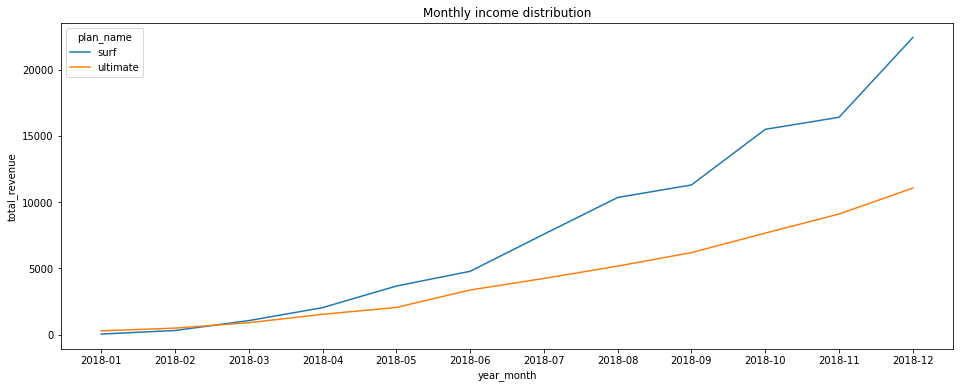

In [81]:
#Check the Income Distribution for Each Package Per Month
plt.figure(figsize =(16,6))
plt.title('Monthly income distribution')
income = df_merge_all.groupby(['plan_name','year_month']).sum()['total_revenue'].reset_index()

sns.lineplot(data = income, x='year_month', y='total_revenue', hue = 'plan_name')
plt.show()


In [82]:
#dataset info
income.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   plan_name      24 non-null     object 
 1   year_month     24 non-null     object 
 2   total_revenue  24 non-null     float64
dtypes: float64(1), object(2)
memory usage: 704.0+ bytes


In [83]:
#chek dataset size
df_merge_all_surf.shape, df_merge_all_ultimate.shape

((1573, 21), (720, 21))

#### Is there a relationship between the package and the age of the user

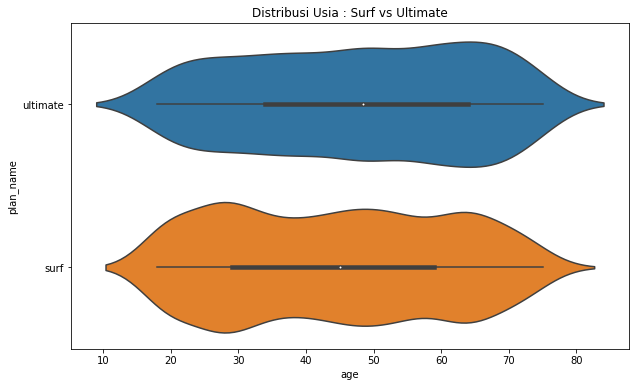

,plan_name,age
0,surf,44.379530
1,ultimate,47.719444


In [84]:
#Check the distribution of the relationship between the package and the age of the user
plt.figure (figsize =(10,6))
plt.title('Distribusi Usia : Surf vs Ultimate')
sns.violinplot(data=df_merge_all, x='age', y = 'plan_name')
plt.show()
df_merge_all.groupby(['plan_name']).mean()['age'].reset_index()

#### Is the older the user, the more income increases?

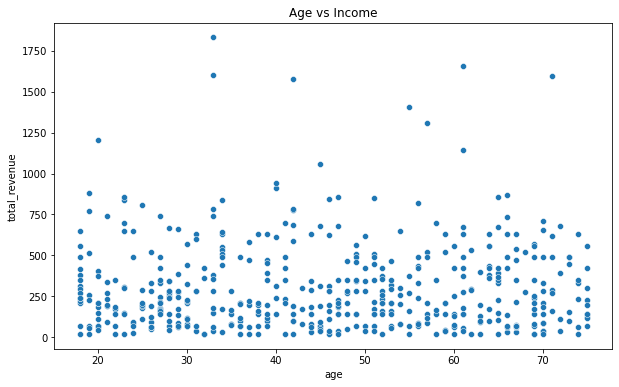

In [85]:
#Check the distribution whether the older the package income is the greater
age_vs_income = df_merge_all.groupby(['user_id','age']).sum()['total_revenue'].reset_index()

plt.figure(figsize =(10,6))
plt.title('Age vs Income')
sns.scatterplot(data=age_vs_income, x='age', y = 'total_revenue')
plt.show()

#### Monthly distribution of phone calls

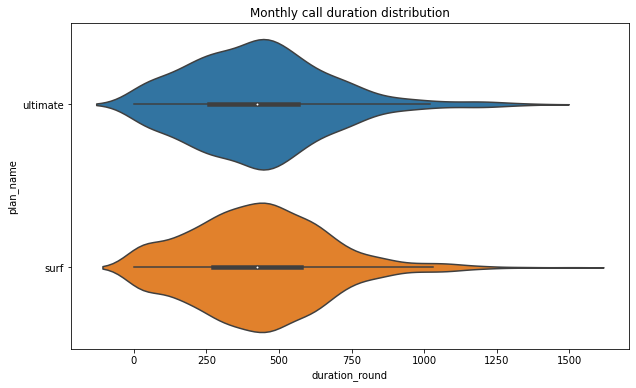

In [86]:
#Create a distribution plot based on call duration
plt.figure(figsize =(10,6))
plt.title('Monthly call duration distribution')
sns.violinplot(data=df_merge_all, x='duration_round', y = 'plan_name')
plt.show()

#### Distribution of Internet usage on a monthly basis

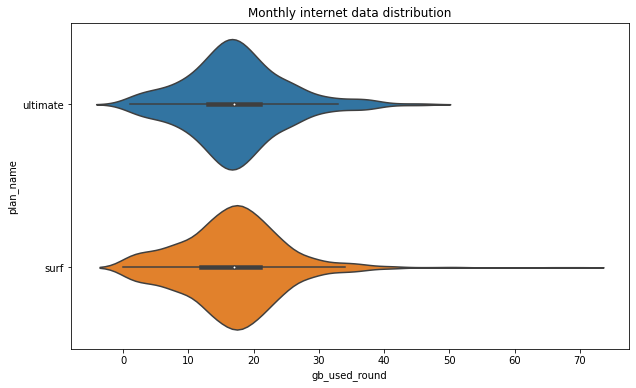

In [87]:
#Creating distribution plots based on Internet usage
plt.figure(figsize =(10,6))
plt.title('Monthly internet data distribution')
sns.violinplot(data=df_merge_all, x='gb_used_round', y = 'plan_name')
plt.show()

 #### Distribution of message usage on a monthly basis

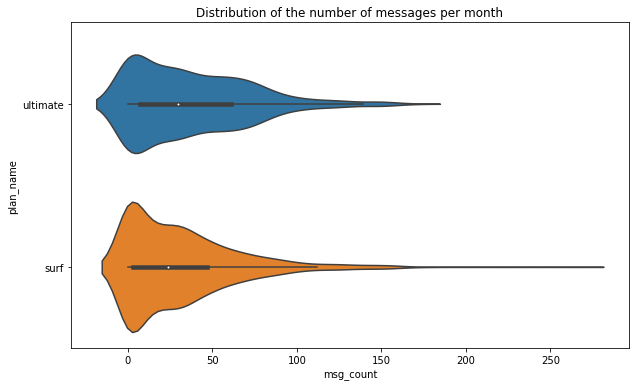

In [88]:
#Create a distribution plot based on the number of messages
plt.figure(figsize =(10,6))
plt.title('Distribution of the number of messages per month')
sns.violinplot(data=df_merge_all, x='msg_count', y = 'plan_name')
plt.show()

####  How much people pay extra costs each month

In [89]:
#Total users by plan
df_merge_all.groupby(['plan_name']).count()['user_id']


plan_name
surf        1573
ultimate     720
Name: user_id, dtype: int64

##### internet extra cost

In [90]:
#Number of users who pay for extra internet costs
df_merge_all.loc[df_merge_all.extra_inet>0].groupby(['plan_name']).count()['user_id']

plan_name
surf        911
ultimate     41
Name: user_id, dtype: int64

In [91]:
#Percentage of people who pay for extra internet
df_merge_all.loc[df_merge_all.extra_inet>0].groupby(['plan_name']).count()['user_id']/df_merge_all.groupby(['plan_name']).count()['user_id']*100

plan_name
surf        57.914812
ultimate     5.694444
Name: user_id, dtype: float64

In [92]:
#Average Extra Internet rating for each package
df_merge_all.loc[df_merge_all.extra_inet>0].groupby(['plan_name']).mean()['extra_inet']

plan_name
surf        66.739846
ultimate    40.634146
Name: extra_inet, dtype: float64

##### phone extra cost

In [93]:
# Number of users who pay for extra phone costs
df_merge_all.loc[df_merge_all.extra_call>0].groupby(['plan_name']).count()['user_id']

plan_name
surf    566
Name: user_id, dtype: int64

In [94]:
# Calculate the percentage of people who pay for extra phones
df_merge_all.loc[df_merge_all.extra_call>0].groupby(['plan_name']).count()['user_id']/df_merge_all.groupby(['plan_name']).count()['user_id']*100


plan_name
surf        35.9822
ultimate        NaN
Name: user_id, dtype: float64

In [95]:
#Average Extra Phone Value for Each Package
df_merge_all.loc[df_merge_all.extra_call>0].groupby(['plan_name']).mean()['extra_call']

plan_name
surf    5.124117
Name: extra_call, dtype: float64

##### message extra cost

In [96]:
#Number of users who paid for extra cost messages
df_merge_all.loc[df_merge_all.extra_msg>0].groupby(['plan_name']).count()['user_id']

plan_name
surf    340
Name: user_id, dtype: int64

In [97]:
#Calculate the percentage of people who pay for extra messages
df_merge_all.loc[df_merge_all.extra_msg>0].groupby(['plan_name']).count()['user_id']/df_merge_all.groupby(['plan_name']).count()['user_id']*100

plan_name
surf        21.614749
ultimate          NaN
Name: user_id, dtype: float64

In [98]:
#Average Extra Message Rating for Each Package
df_merge_all.loc[df_merge_all.extra_msg>0].groupby(['plan_name']).mean()['extra_msg']

plan_name
surf    0.973324
Name: extra_msg, dtype: float64

### Provisional Conclusion

    
 Findings:

- Monthly Revenue Distribution:
  - At the beginning of the month, the revenue from the Ultimate package is higher than the Surf package.
  - As the months progress, after the second month, the Surf package's revenue surpasses the Ultimate package.
  - Towards the end of the year, the Surf package's revenue significantly outperforms the Ultimate package.
  - The number of Surf package users is twice as many as Ultimate package users.
- Relationship between Package and User Age:
  - The average age of Surf and Ultimate package users doesn't significantly differ, with Surf package at 44.3 and Ultimate package at 47.7.
  - The Surf package is more popular among younger users (20-30 years old), while the Ultimate package is favored by older users (60-70 years old).
- Impact of Age on Revenue:
  - The scatterplot pattern doesn't show a clear relationship between user age and revenue.
  - The distribution is scattered evenly across various age groups.
- Monthly Call Distribution:

  - The average number of calls per month for Surf and Ultimate packages is quite similar, with 428.7 for Surf and 430.4 for Ultimate.
  - The distribution pattern for both packages is similar.
- Monthly Internet Usage Distribution:

  - Similar to calls, the average monthly internet usage for Surf and Ultimate packages is quite similar, with 16.6 for Surf and 17.3 for Ultimate.
  - The distribution pattern for both packages is similar.
- Monthly Message Distribution:

  - The average number of messages for Surf and Ultimate packages is similar, with 31.1 for Surf and 37.5 for Ultimate.
  - The distribution pattern for both packages is similar but wider, due to Surf package users being twice as many as Ultimate package users.
- Extra Costs Incurred by Users:

  - Extra Internet Cost:
    - Paid by 911 users (58%) of Surf package users and 41 users (5.7%) of Ultimate package users.
    - The average extra cost paid is 66.7 USD for Surf and 40.6 USD for Ultimate.
  - Extra Call Cost:
    - Paid by 566 users (36%) of Surf package users.
    - The average extra call cost for Surf is 5.12 USD.
    - No Ultimate package users pay extra call costs.
  - Extra Message Cost:
    - Paid by 340 users (21.6%) of Surf package users.
    - The average extra message cost for Surf is 0.97 USD.
    - No Ultimate package users pay extra message costs.

Insights:

- There is a potential for higher revenue from the Surf package due to its larger user base, even though the Surf package is cheaper.
- The Surf package is preferred by younger users, while the Ultimate package is more popular among older users.
- There is no clear correlation between user age and revenue increase.
- A significant portion of Surf users pay extra internet costs, while Ultimate users pay lesser extra costs.
- Users of the Ultimate package have no extra costs related to calls and messages.

Recommendations:

- Introduce a package above Surf and below Ultimate to cater to different user segments.
- Consider offering additional internet packages for users.
- Enhance the Ultimate package to encourage extra costs, particularly in calls and messages.

### Test the hypothesis

#### The average income from Ultimate and Surf phone plan users is different.

Note :
- Numerical vs Numerical
- methode : Independent T-Test
-Hypothesis:
 - H0 (null Hypothesis) = Average revenue from ultimate phone and surf plan users is the SAME
 - H1 (Alternative Hypothesis) = Average income from ultimate phone and surf plan users is NOT the SAME
- alpha = 0.05

In [99]:
def verdict (p_value, alpha = 0.05):
    print ('P-Value:',p_value)
    if p_value < alpha:
        print ('H1 Accepted / H0 Rejected')
    else :
        print ('H0 Accepted / H1 Rejected')

In [100]:
paket_ulti = df_merge_all.loc[(df_merge_all.plan_name == 'ultimate') & ~(df_merge_all.gb_used_round.isna()),'gb_used_round']

paket_surf = df_merge_all.loc[(df_merge_all.plan_name == 'surf') & ~(df_merge_all.gb_used_round.isna()),'gb_used_round']

In [101]:
paket_ulti.var(), paket_surf.var()

(58.830549760469786, 61.58359983759012)

In [102]:
paket_ulti.mean(), paket_surf.mean()

(17.306944444444444, 16.670692943420217)

In [103]:
p_value2 = ttest_ind(paket_ulti,paket_surf,equal_var=True).pvalue
verdict(p_value2)

P-Value: 0.06970837213503832
H0 Accepted / H1 Rejected


#### Average revenue from users in the NY-NJ area is different from the income of users from other regions.

Note : 
- Category VS Category
- methode : Chi-square
-Hypothesis:
 - H0 = no relationship between ny-nj city and package usage
 - H1 = there is a relationship between ny-nj city and package usage
 
- alpha = 0.05

In [104]:
#prepare the data
data_cityplan = pd.pivot_table(df_merge_all, index='plan_name', columns = 'is_ny_nj', values='user_id', aggfunc='nunique')
data_cityplan

is_ny_nj,False,True
plan_name,,
surf,273,60
ultimate,138,19


In [105]:
p_value = chi2_contingency(data_cityplan)[1]
verdict(p_value)

P-Value: 0.12598168052885783
H0 Accepted / H1 Rejected


#### Conclusion of the hypothesis test

Findings:

- The average revenue from using the Surf and Ultimate packages is the SAME.
- The average and variance values for both Surf and Ultimate packages are not significantly different.
- The average usage of the Surf package exceeds its allocated quota, while the Ultimate package falls below the quota.
- There is no significant correlation between the NY-NJ region and package usage.

Insight:

- Younger users require a larger quota than what the Surf package offers.
- Consumer behavior is not influenced by the NY-NJ region, and the average revenue from both packages is equal.

Recommendation:

- Introduce a middle-tier package that falls between the Surf and Ultimate packages.

### Write the conclusion thoroughly

General Conclusion : 
- Regardless of the type of package used, the general user behavior is the same
- Surf packages bring more profit

Findings:

- Monthly Revenue Distribution:
  - At the beginning of the month, Ultimate package revenue surpasses the Surf package.
  - Subsequently, after the 2nd month, Surf package revenue overtakes Ultimate package.
  - Towards the end of the year, Surf package revenue significantly surpasses Ultimate package.
  - The number of Surf package users is twice as many as Ultimate package users.
- Relationship between Package and User Age:
  - The average age of Surf package users (44.3) and Ultimate package users (47.7) doesn't differ significantly.
  - Surf package is preferred by younger individuals (20-30 years), while Ultimate package is used more by older individuals (60-70 years).
- Impact of Age on Revenue:
  - The scatterplot pattern shows an unpredictable trend.
  - Revenue distribution is relatively consistent across age groups.
- Monthly Call Distribution:
  - The average number of calls for Surf and Ultimate packages are almost the same: 428.7 for Surf and 430.4 for Ultimate.
  - Distribution patterns for Surf and Ultimate packages are similar.
- Monthly Internet Usage Distribution:
  - The average internet usage for Surf and Ultimate packages is nearly the same: 16.6 for Surf and 17.3 for Ultimate.
  - Distribution patterns for Surf and Ultimate packages are similar.
- Monthly Message Distribution:
  - The average message usage for Surf and Ultimate packages is almost the same: 31.1 for Surf and 37.5 for Ultimate.
  - Distribution patterns for Surf and Ultimate packages are similar, although the Surf package's wider distribution is due to its larger user base.
- Extra Costs Incurred by Users:
  - Internet Extra Cost:
    - Paid by 911 users (58%) of Surf package and 41 users (5.7%) of Ultimate package.
    - The average internet extra cost is usd 66.7 for Surf package and usd 40.6 for Ultimate package.
  - Call Extra Cost:
    - Paid by 566 users (36%) of Surf package.
    - The average call extra cost for Surf package is 5.12 usd
    - No Ultimate package users pay extra call cost.
  - Message Extra Cost:
    - Paid by 340 users (21.6%) of Surf package.
    - The average message extra cost for Surf package is 0.97 usd
    - No Ultimate package users pay extra message cost.

- Hypothesis Testing Conclusion:
  - The average revenue from using the Surf and Ultimate packages is the SAME.
  - The average and variance values for both Surf and Ultimate packages are not significantly different.
  - The average usage of the Surf package exceeds its allocated quota, while the Ultimate package falls below the quota.
  - There is no significant correlation between the NY-NJ region and package usage.

Insights:

- The revenue potential of the Surf package surpasses the Ultimate package due to its larger user base.
- The Surf package is favored by younger users.
- The Ultimate package is preferred by older and more mature individuals.
- There is no discernible pattern indicating that revenue increases with age.
- Despite the relatively affordable $20 USD Surf package, 58% of users pay an average extra cost of $66.7 USD.
- Ultimate package users generally don't incur significant extra costs, especially for calls and messages.
- Younger users require larger quotas than what the Surf package offers.
- Consumer behavior isn't influenced by the NY-NJ region, and the average revenue from both packages is equal.

Recommendations:

- Consider introducing a new package tier above Surf but below Ultimate.
- Develop packages with additional internet quotas for users.
- Enhance the Ultimate package to encourage users to incur extra costs, particularly for calls and messages.